# FORCE 2020 EXERCISE

### Loading the Data
The dataset for this example is a subset of a dataset that was used for a ML competition hosted by FORCE 2020 and XEEK for the prediction of lithology from well logging measurements. Dataset can be found in https://github.com/andymcdgeo/Andys_YouTube_Notebooks/blob/main/Data/force2020_data_unsupervised_learning.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

total_data = pd.read_csv('C:/Users/Jorge Payà/Desktop/4Geeks/DSML Bootcamp/KMeans-project/data/raw/force2020.csv')
total_data.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342


In [2]:
total_data.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,18270.000000,18270.000000,18270.000000,14032.000000,16440.000000,18189.000000
mean,2.110451,63.847477,1883.228478,0.404547,3.463851,125.106178
std,0.297725,28.636331,801.941195,0.133532,2.561239,30.618337
min,1.404576,6.191506,494.528000,0.024330,1.010027,55.726753
25%,1.963399,43.866690,1188.750000,0.315346,2.320836,90.883087
50%,2.055079,66.777851,1882.972000,0.448527,2.790249,141.300461
75%,2.381963,81.542681,2577.802000,0.506343,4.267342,148.048355
max,2.927888,499.022583,3272.024000,0.800262,66.030319,175.953140


In [3]:
# Remove null values
total_data = total_data.dropna() # also can be written as total_data.dropna(inplace=True)

In [4]:
total_data.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000
mean,2.149947,61.253852,2066.272839,0.414572,3.912313,121.409905
std,0.251592,29.902708,535.691815,0.139207,1.816933,30.394369
min,1.493417,6.191506,1138.704000,0.037976,1.126667,55.726753
25%,1.983767,42.792794,1602.342000,0.313797,2.629141,89.977041
50%,2.059335,62.886322,2065.980000,0.466891,3.365132,138.477173
75%,2.389839,77.726776,2530.226000,0.513840,4.686422,146.242302
max,2.889454,499.022583,2993.864000,0.800262,17.026619,163.910797


### Transform the Data
We will standarize the data using the StandardScaler function. To account for variations in measurements units and scale, it is common practice prior to ML to standarize the data. <u>Due to there are features that have been measured in their own units and have their own data ranges, some features may end up having more influence over the final results compared to others</u>. To reduce this impact we need to take each feature and subtract the mean of that features from the values and then dividing by the feature's std.

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

total_data[['RHOB_T', 'GR_T', 'NPHI_T', 'PEF_T', 'DTC_T']] = scaler.fit_transform(total_data[['RHOB', 'GR', 'NPHI', 'PEF', 'DTC']])
total_data.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,RHOB_T,GR_T,NPHI_T,PEF_T,DTC_T
4238,1.774626,55.892757,1138.704,0.765867,1.631495,147.837677,-1.491843,-0.179292,2.523654,-1.255364,0.869531
4239,1.800986,60.929138,1138.856,0.800262,1.645080,142.382431,-1.387067,-0.010859,2.770744,-1.247886,0.690042
4240,1.817696,62.117264,1139.008,0.765957,1.645873,138.258331,-1.320646,0.028875,2.524300,-1.247450,0.554350
4241,1.829333,61.010860,1139.160,0.702521,1.620216,139.198914,-1.274390,-0.008126,2.068584,-1.261572,0.585297
4242,1.813854,58.501236,1139.312,0.639708,1.504854,144.290085,-1.335919,-0.092056,1.617342,-1.325067,0.752808


### Clustering the Data
There are a number of ways to identify the optimum number of clusters. The method we are going to look at below is knon as the Elbow method. This method allows us to plot the inertia, which is a measure of how well the data was clustered by the K-Means algorithm against the number of clusters. From this plot, we are looking for a point where the inertia begins to slow.

In [6]:
from sklearn.cluster import KMeans

def optmitise_k_means(data, max_k): # max_k is the maximum number of clusters we want to test for the inertia calculation 
    means = [] # list of means
    inertias = [] # list of inertias

    for k in range(1, max_k): # we will test from 1 to max_k clusters
        kmeans = KMeans(n_clusters=k) # we create the KMeans object
        kmeans.fit(data)          # we fit the data
        means.append(k)          # we append the number of clusters to the means list
        inertias.append(kmeans.inertia_) # we append the inertia to the inertias list


    plt.figure(figsize=(15, 5))
    plt.plot(means, inertias, '-o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Inertia across number of clusters')
    plt.grid(True)
    plt.show()

# we will apply to only 2 variables 

c:\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


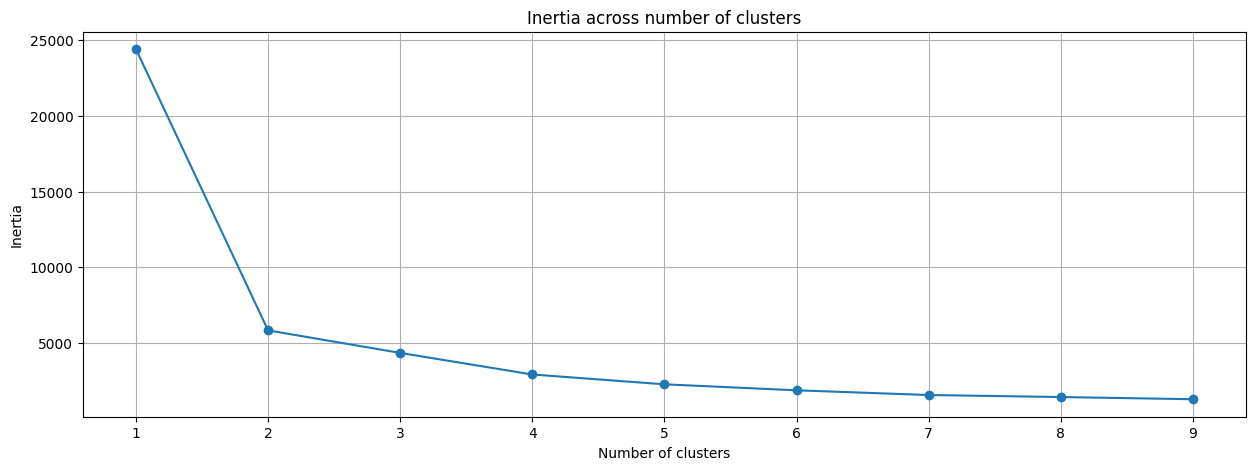

In [7]:
# For visualization simplicity, we will only use RHOB_T and NPHI_T
optmitise_k_means(total_data[['RHOB_T', 'NPHI_T']], 10) # we will test from 1 to 10 clusters

In the plot above we can see that the inertia (sum of the squared distances to the nearest cluster center) decreases as we increase the number of clusters. We can see that there is a big change in inertia and slope from 2 clusters onwards. We have a gradual decline so we can select 3 clusters.

### Applying KMeans Clustering

In [8]:
kmeans = KMeans(n_clusters=3) # we create the KMeans object
kmeans.fit(total_data[['RHOB_T', 'NPHI_T']]) # we fit the data with only RHOB_T and NPHI_T

KMeans(n_clusters=3)

In [36]:
total_data['kmeans_3'] = kmeans.labels_ # we create a new column with the cluster labels
total_data.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,RHOB_T,GR_T,NPHI_T,PEF_T,DTC_T,kmeans_3
4238,1.774626,55.892757,1138.704,0.765867,1.631495,147.837677,-1.491843,-0.179292,2.523654,-1.255364,0.869531,0
4239,1.800986,60.929138,1138.856,0.800262,1.645080,142.382431,-1.387067,-0.010859,2.770744,-1.247886,0.690042,0
4240,1.817696,62.117264,1139.008,0.765957,1.645873,138.258331,-1.320646,0.028875,2.524300,-1.247450,0.554350,0
4241,1.829333,61.010860,1139.160,0.702521,1.620216,139.198914,-1.274390,-0.008126,2.068584,-1.261572,0.585297,0
4242,1.813854,58.501236,1139.312,0.639708,1.504854,144.290085,-1.335919,-0.092056,1.617342,-1.325067,0.752808,0


### Plotting the results

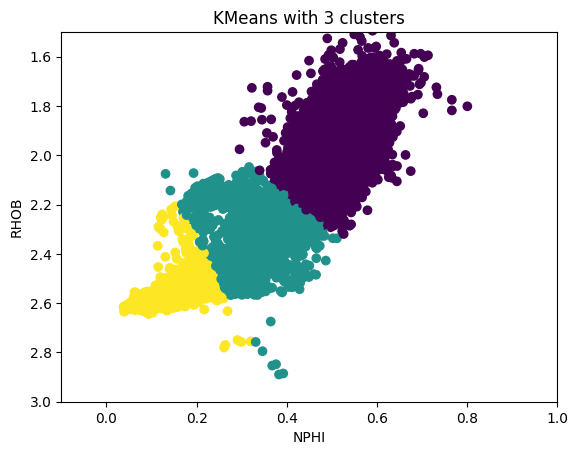

In [37]:
plt.scatter(x=total_data['NPHI'], y=total_data['RHOB'], c=total_data['kmeans_3'], cmap='viridis')
plt.xlim(-0.1, 1)
plt.ylim(3, 1.5)
plt.xlabel('NPHI')
plt.ylabel('RHOB')
plt.title('KMeans with 3 clusters')
plt.show()

### Creating multiple clusters

In [38]:
for k in range(1, 6):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(total_data[['RHOB_T', 'NPHI_T']])
    total_data[f'kmeans_{k}'] = kmeans.labels_

total_data.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,RHOB_T,GR_T,NPHI_T,PEF_T,DTC_T,kmeans_3,kmeans_1,kmeans_2,kmeans_4,kmeans_5
4238,1.774626,55.892757,1138.704,0.765867,1.631495,147.837677,-1.491843,-0.179292,2.523654,-1.255364,0.869531,0,0,1,0,1
4239,1.800986,60.929138,1138.856,0.800262,1.645080,142.382431,-1.387067,-0.010859,2.770744,-1.247886,0.690042,0,0,1,0,1
4240,1.817696,62.117264,1139.008,0.765957,1.645873,138.258331,-1.320646,0.028875,2.524300,-1.247450,0.554350,0,0,1,0,1
4241,1.829333,61.010860,1139.160,0.702521,1.620216,139.198914,-1.274390,-0.008126,2.068584,-1.261572,0.585297,0,0,1,0,1
4242,1.813854,58.501236,1139.312,0.639708,1.504854,144.290085,-1.335919,-0.092056,1.617342,-1.325067,0.752808,0,0,1,0,1


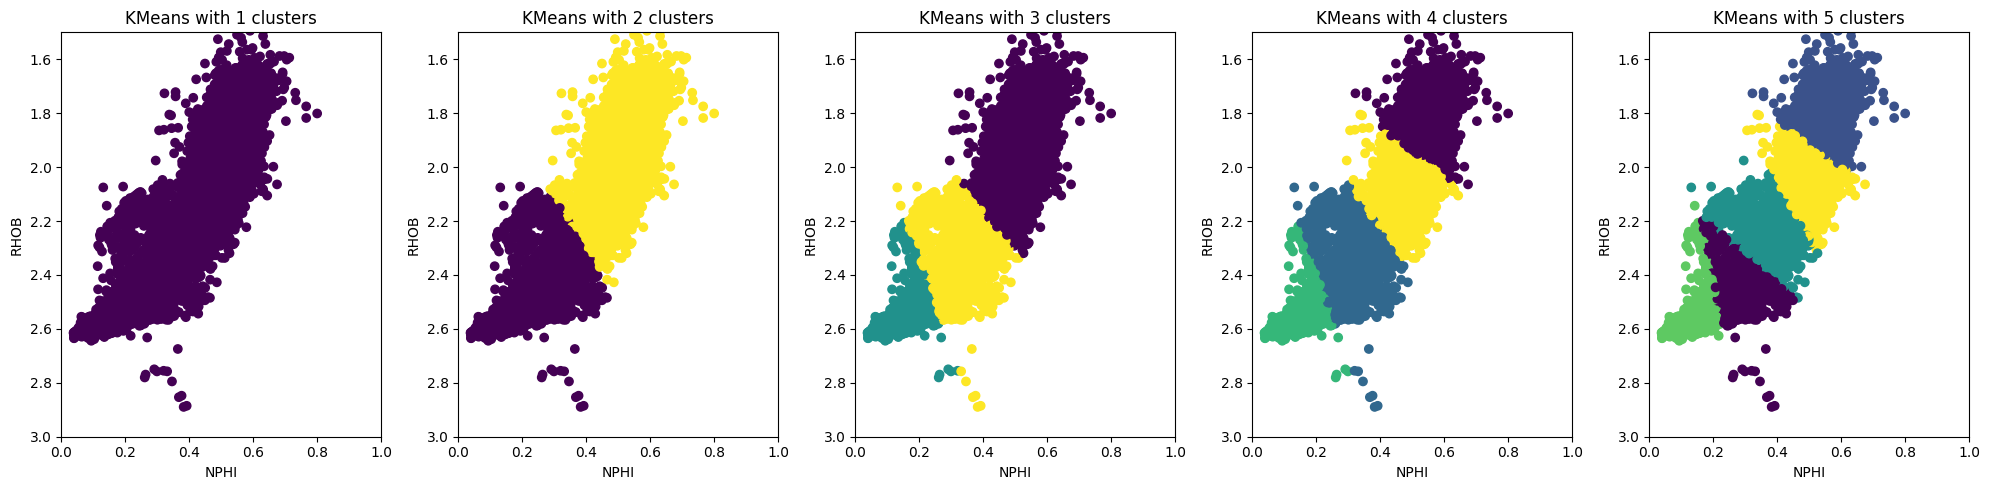

In [40]:
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=total_data['NPHI'], y=total_data['RHOB'], c=total_data[f'kmeans_{i}'], cmap='viridis')
    ax.set_xlim(0, 1)
    ax.set_ylim(3, 1.5)
    ax.set_xlabel('NPHI')
    ax.set_ylabel('RHOB')
    ax.set_title(f'KMeans with {i} clusters')

plt.tight_layout()
plt.show()